In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0


y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), #(26,26,32)
    layers.Conv2D(32, (3,3), activation='relu'),#(24,24,32)
    layers.MaxPooling2D((2,2)),#(12,12,32)

    layers.Conv2D(64, (3,3), activation='relu'),#(10,10,64)
    layers.Conv2D(64, (3,3), activation='relu'),#(8,8,64)
    layers.MaxPooling2D((2,2)),#(4,4,64)

    layers.Flatten(), #(1024)
    layers.Dense(128, activation='relu'), #(1024,128)
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred_classes, digits=4))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 108s 125ms/step - accuracy: 0.8823 - loss: 0.3670 - val_accuracy: 0.9757 - val_loss: 0.0794
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 102s 120ms/step - accuracy: 0.9846 - loss: 0.0480 - val_accuracy: 0.9855 - val_loss: 0.0542
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 101s 120ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9905 - val_loss: 0.0361
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 122ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9913 - val_loss: 0.0312
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 140s 120ms/step - accuracy: 0.9951 - loss: 0.0169 - val_accuracy: 0.9917 - val_loss: 0.0339
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0     0.9959    0.9949    0.9954       980
           1     0.9938    0.9947    0.9943      1135
           2     0.9923    0.9932    0.9927      1032
           3     0.9902    0.9970    0.9936      1010
           4     0.9929    0.994

In [ ]:
def svd_reconstruct(image, k):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return (U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim


idx = 0
original = x_test[idx].squeeze()  # (28, 28)

In [ ]:
# Obrazy po SVD
k_values = [3, 5, 10]
reconstructed = [svd_reconstruct(original, k) for k in k_values]

orginal: SSIM=1.0000
k=3:  SSIM=0.5886
k=5:  SSIM=0.7924
k=10:  SSIM=0.9755


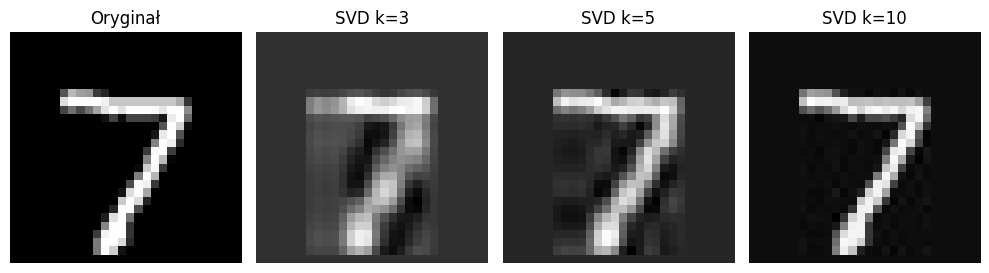

In [ ]:
s = ssim(original, original, data_range=1.0)
print(f"orginal: SSIM={s:.4f}")

# Porównanie jakości
for k, rec in zip(k_values, reconstructed):
    s = ssim(original, rec, data_range=1.0)
    print(f"k={k}:  SSIM={s:.4f}")

# Wizualizacja
plt.figure(figsize=(10,3))
plt.subplot(1, len(k_values)+1, 1)
plt.imshow(original, cmap='gray')
plt.title("Oryginał")
plt.axis("off")

for i, k in enumerate(k_values):
    plt.subplot(1, len(k_values)+1, i+2)
    plt.imshow(reconstructed[i], cmap='gray')
    plt.title(f"SVD k={k}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras import Model


_ = model.predict(x_test[:1])  # inicjalizacja modelu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
from tensorflow.keras import Model

layer_name = 'max_pooling2d_1'
intermediate_model = Model(inputs=model.inputs,
                           outputs=model.get_layer(layer_name).output)

feature_maps = intermediate_model.predict(x_test[:1])
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
(1, 4, 4, 64)


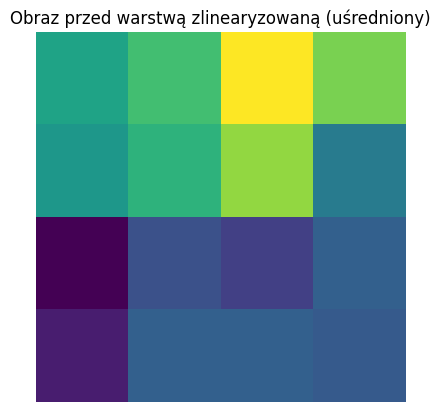

In [ ]:
import matplotlib.pyplot as plt

mean_feature = np.mean(feature_maps[0], axis=-1)

plt.imshow(mean_feature, cmap='viridis')
plt.title("Obraz przed warstwą zlinearyzowaną (uśredniony)")
plt.axis('off')
plt.show()


k=1:  SSIM=0.9528
k=3:  SSIM=0.9999
k=4:  SSIM=1.0000


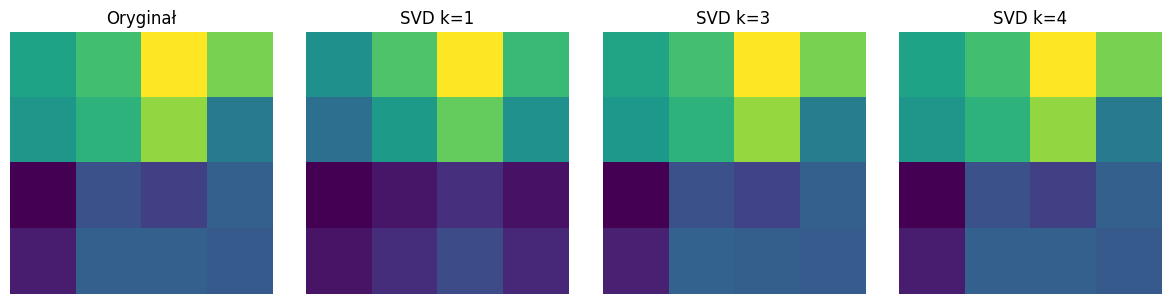

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# mean_feature to Twój obraz (4x4)
# np.mean(feature_maps[0], axis=-1) -> shape (4, 4)
feature = mean_feature

# Funkcja do rekonstrukcji SVD
def svd_reconstruct(image, k):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

# Wybieramy k (nie większe niż 4 bo obraz 4x4)
k_values = [1, 3, 4]
reconstructed = [svd_reconstruct(feature, k) for k in k_values]

for k, rec in zip(k_values, reconstructed):
    s = ssim(feature, rec, data_range=1.0, win_size=3)
    print(f"k={k}:  SSIM={s:.4f}")


# Wizualizacja
plt.figure(figsize=(12,3))
plt.subplot(1, len(k_values)+1, 1)
plt.imshow(feature, cmap='viridis')
plt.title("Oryginał")
plt.axis('off')

for i, k in enumerate(k_values):
    plt.subplot(1, len(k_values)+1, i+2)
    plt.imshow(reconstructed[i], cmap='viridis')
    plt.title(f"SVD k={k}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
flatten_to_dense_layer = model.layers[-2]  # Warstwa Dense(128)
W_original, b_original = flatten_to_dense_layer.get_weights()
print(f"\nOriginal weight matrix shape: {W_original.shape}")
print(f"Original weight matrix size: {W_original.size} parameters")


Original weight matrix shape: (1024, 128)
Original weight matrix size: 131072 parameters


In [ ]:
def svd_only_reconstruct(U, S, Vt, k):
    return (U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :])

U, S, Vt = np.linalg.svd(W_original, full_matrices=False)

In [ ]:
k_values = [16, 32, 64]
results = []

for k in k_values:
  print(f"\n{'='*60}")
  print(f"TESTING k = {k}")
  print(f"{'='*60}")

  W_compressed = svd_only_reconstruct(U, S, Vt, k)

  s = ssim(W_original, W_compressed, data_range=1.0)
  print(f"k={k}:  SSIM={s:.4f}")

  original_params = W_original.size
  compressed_params = U.shape[0] * k + k + k * Vt.shape[1]
  compression_ratio = original_params / compressed_params
  memory_saved = (1 - compressed_params / original_params) * 100

  print(f"\nMemory Analysis:")
  print(f"  Original parameters: {original_params:,}")
  print(f"  Compressed parameters: {compressed_params:,} (U: {U.shape[0]*k:,}, S: {k}, Vt: {k*Vt.shape[1]:,})")
  print(f"  Compression ratio: {compression_ratio:.2f}x")
  print(f"  Memory saved: {memory_saved:.2f}%")

  model_compressed = models.clone_model(model)
  model_compressed.set_weights(model.get_weights())
  model_compressed.layers[-2].set_weights([W_compressed, b_original])
  model_compressed.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  y_pred_comp = model_compressed.predict(x_test, verbose=0)
  y_pred_comp_classes = y_pred_comp.argmax(axis=1)
  accuracy = (y_pred_comp_classes == y_test).mean()

  print(f"\nPerformance:")
  print(f"  Accuracy: {accuracy:.4f}")

  results.append({
        'k': k,
        'accuracy': accuracy,
        'compression_ratio': compression_ratio,
        'memory_saved': memory_saved,
        'ssim': ssim,
        'model': model_compressed
    })


TESTING k = 16
k=16:  SSIM=0.5614

Memory Analysis:
  Original parameters: 131,072
  Compressed parameters: 18,448 (U: 16,384, S: 16, Vt: 2,048)
  Compression ratio: 7.10x
  Memory saved: 85.93%

Performance:
  Accuracy: 0.9911

TESTING k = 32
k=32:  SSIM=0.6797

Memory Analysis:
  Original parameters: 131,072
  Compressed parameters: 36,896 (U: 32,768, S: 32, Vt: 4,096)
  Compression ratio: 3.55x
  Memory saved: 71.85%

Performance:
  Accuracy: 0.9916

TESTING k = 64
k=64:  SSIM=0.8246

Memory Analysis:
  Original parameters: 131,072
  Compressed parameters: 73,792 (U: 65,536, S: 64, Vt: 8,192)
  Compression ratio: 1.78x
  Memory saved: 43.70%

Performance:
  Accuracy: 0.9918


In [ ]:
for i, result in enumerate(results):
  k = result['k']
  model_finetuned = result['model']

  for layer in model_finetuned.layers[:-1]:
          layer.trainable = False

  model_finetuned.layers[-1].trainable = True

  model_finetuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  print(f"Training only the last layer (Dense 10)...")
  print(f"Trainable parameters: {sum([tf.size(w).numpy() for w in model_finetuned.trainable_weights]):,}")

  history_ft = model_finetuned.fit(
          x_train, y_train_cat,
          epochs=3,
          batch_size=64,
          validation_split=0.1,
          verbose=1
      )

  y_pred_ft = model_finetuned.predict(x_test, verbose=0)
  y_pred_ft_classes = y_pred_ft.argmax(axis=1)
  accuracy_ft = (y_pred_ft_classes == y_test).mean()

  print(f"\nResults for k = {k}:")
  print(f"  Before fine-tuning: {result['accuracy']:.4f}")
  print(f"  After fine-tuning:  {accuracy_ft:.4f}")
  print(f"  Improvement: {(accuracy_ft - result['accuracy'])*100:.2f}%\n")

  result['accuracy_finetuned'] = accuracy_ft
  result['improvement'] = accuracy_ft - result['accuracy']

Training only the last layer (Dense 10)...
Trainable parameters: 1,290
Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9970 - loss: 0.0089 - val_accuracy: 0.9913 - val_loss: 0.0330
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 39ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9917 - val_loss: 0.0318
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9915 - val_loss: 0.0328

Results for k = 16:
  Before fine-tuning: 0.9911
  After fine-tuning:  0.9936
  Improvement: 0.25%
Training only the last layer (Dense 10)...
Trainable parameters: 1,290
Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.9915 - val_loss: 0.0328
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9977 - loss: 0.0077 - val_accuracy: 0.9920 - val_loss: 0.0309
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9979 - loss: 0.0070 - val_accuracy: 0.9917 - v

In [ ]:
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist

def bicluster_matrix(W):
    """Reorder matrix rows and columns using hierarchical clustering"""
    # Cluster rows
    row_linkage = linkage(pdist(W, metric='euclidean'), method='ward')
    row_order = leaves_list(row_linkage)

    # Cluster columns
    col_linkage = linkage(pdist(W.T, metric='euclidean'), method='ward')
    col_order = leaves_list(col_linkage)

    return row_order, col_order

# Apply biclustering
print("\nApplying biclustering to weight matrix...")
row_order, col_order = bicluster_matrix(W_original)
W_reordered = W_original[row_order, :][:, col_order]

print(f"Row permutation: {row_order[:10]}...")
print(f"Column permutation: {col_order[:10]}...")

# Test biclustered compression
results_bicluster = []

for k in k_values:
    print(f"\n{'='*60}")
    print(f"BICLUSTERED SVD with k = {k}")
    print(f"{'='*60}")

    # SVD on reordered matrix
    U_reord, S_reord, Vt_reord = np.linalg.svd(W_reordered, full_matrices=False)
    W_reord_compressed = svd_only_reconstruct(U_reord, S_reord, Vt_reord, k)

    # Reconstruction error on reordered matrix
    # recon_error_reord = np.linalg.norm(W_reordered - W_reord_compressed) / np.linalg.norm(W_reordered)
    # print(f"Reconstruction error (reordered): {recon_error_reord:.6f}")
    s_r = ssim(W_reordered, W_reord_compressed, data_range=1.0)
    print(f"SSIM (reordered): {s_r:.4f}")

    # Invert permutation to get back original order
    inv_row_order = np.argsort(row_order)
    inv_col_order = np.argsort(col_order)
    W_compressed_back = W_reord_compressed[inv_row_order, :][:, inv_col_order]

    # Reconstruction error in original space
    # recon_error_original = np.linalg.norm(W_original - W_compressed_back) / np.linalg.norm(W_original)
    # print(f"Reconstruction error (original space): {recon_error_original:.6f}")
    s = ssim(W_original, W_compressed_back, data_range=1.0)
    print(f"SSIM (original order): {s:.4f}")

    # Create model with biclustered compression
    model_bicluster = models.clone_model(model)
    model_bicluster.set_weights(model.get_weights())
    model_bicluster.layers[-2].set_weights([W_compressed_back, b_original])
    model_bicluster.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Evaluate
    y_pred_bi = model_bicluster.predict(x_test, verbose=0)
    y_pred_bi_classes = y_pred_bi.argmax(axis=1)
    accuracy_bi = (y_pred_bi_classes == y_test).mean()

    print(f"Accuracy (biclustered): {accuracy_bi:.4f}")

    # Compare with regular SVD
    regular_result = [r for r in results if r['k'] == k][0]
    print(f"Accuracy (regular SVD): {regular_result['accuracy']:.4f}")
    print(f"Improvement from biclustering: {(accuracy_bi - regular_result['accuracy'])*100:.2f}%")

    results_bicluster.append({
        'k': k,
        'accuracy': accuracy_bi,
        'ssim_reordered': s_r,
        'ssim_original': s
    })


Applying biclustering to weight matrix...
Row permutation: [525 781 807 817 776 773 788 899 497 839]...
Column permutation: [  8  39 117  87   5  24  81  69 109  51]...

BICLUSTERED SVD with k = 16
SSIM (reordered): 0.5469
SSIM (original order): 0.5614
Accuracy (biclustered): 0.9911
Accuracy (regular SVD): 0.9911
Improvement from biclustering: 0.00%

BICLUSTERED SVD with k = 32
SSIM (reordered): 0.6754
SSIM (original order): 0.6797
Accuracy (biclustered): 0.9916
Accuracy (regular SVD): 0.9916
Improvement from biclustering: 0.00%

BICLUSTERED SVD with k = 64
SSIM (reordered): 0.8332
SSIM (original order): 0.8246
Accuracy (biclustered): 0.9918
Accuracy (regular SVD): 0.9918
Improvement from biclustering: 0.00%
